<a href="https://colab.research.google.com/github/Chenhere22/Trips-by-duration-purpose-and-main-destination/blob/main/Reisen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving estat_tour_dem_tnw.csv to estat_tour_dem_tnw.csv


In [ ]:
import pandas as pd
df=pd.read_csv('estat_tour_dem_tnw.csv', sep=";", header=0, encoding="utf-8")

# cleaning up whitespace with

df.columns = df.columns.str.strip()

df.head()

,freq,c_dest,purpose,duration,unit,geo\TIME_PERIOD,2017,2018,2019,2020,2021,2022,2023
0,A,AFR,PER,N1-3,NR,AT,: u,: u,: u,:,: u,: u,: u
1,A,AFR,PER,N1-3,NR,BE,: u,: u,: u,: u,: u,: u,: u
2,A,AFR,PER,N1-3,NR,BG,:,:,: u,:,:,:,: u
3,A,AFR,PER,N1-3,NR,CH,:,:,: u,:,:,: u,:
4,A,AFR,PER,N1-3,NR,CY,:,: u,: u,: u,:,:,: u


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23973 entries, 0 to 23972
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   freq             23973 non-null  object
 1   c_dest           23973 non-null  object
 2   purpose          23973 non-null  object
 3   duration         23973 non-null  object
 4   unit             23973 non-null  object
 5   geo\TIME_PERIOD  23973 non-null  object
 6   2017             23973 non-null  object
 7   2018             23973 non-null  object
 8   2019             23973 non-null  object
 9   2020             23973 non-null  object
 10  2021             23973 non-null  object
 11  2022             23973 non-null  object
 12  2023             23973 non-null  object
dtypes: object(13)
memory usage: 2.4+ MB


In [ ]:
df.isna().sum()

,0
freq,0
c_dest,0
purpose,0
duration,0
unit,0
geo\TIME_PERIOD,0
2017,0
2018,0
2019,0
2020,0


In [ ]:
years = [str(year) for year in range(2017, 2024)]
df[years] = df[years].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23973 entries, 0 to 23972
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             23973 non-null  object 
 1   c_dest           23973 non-null  object 
 2   purpose          23973 non-null  object 
 3   duration         23973 non-null  object 
 4   unit             23973 non-null  object 
 5   geo\TIME_PERIOD  23973 non-null  object 
 6   2017             6276 non-null   float64
 7   2018             6432 non-null   float64
 8   2019             6536 non-null   float64
 9   2020             5854 non-null   float64
 10  2021             6308 non-null   float64
 11  2022             7631 non-null   float64
 12  2023             7064 non-null   float64
dtypes: float64(7), object(6)
memory usage: 2.4+ MB


In [ ]:
df.isna().sum()

,0
freq,0
c_dest,0
purpose,0
duration,0
unit,0
geo\TIME_PERIOD,0
2017,17697
2018,17541
2019,17437
2020,18119


In [ ]:
# Drop rows where any year column is missing
df = df.dropna(subset=years)

df.head(20)

,freq,c_dest,purpose,duration,unit,geo\TIME_PERIOD,2017,2018,2019,2020,2021,2022,2023
38,A,AFR,PER,N_GE1,NR,DE,42641813.0,53207799.0,43970944.0,8611317.0,14919020.0,22232428.0,31962794.0
40,A,AFR,PER,N_GE1,NR,EA20,99683852.0,117286513.0,113976385.0,29142586.0,42944630.0,87341554.0,117598304.0
43,A,AFR,PER,N_GE1,NR,ES,13326118.0,13987973.0,10808073.0,2379100.0,6821497.0,14465720.0,20995767.0
46,A,AFR,PER,N_GE1,NR,FR,19531308.0,23347134.0,23772837.0,8177445.0,6256110.0,20133874.0,29000654.0
48,A,AFR,PER,N_GE1,NR,HU,565938.0,456559.0,1030254.0,90766.0,320459.0,511381.0,600000.0
51,A,AFR,PER,N_GE1,NR,LT,350541.0,569916.0,588941.0,177013.0,226153.0,562634.0,595114.0
52,A,AFR,PER,N_GE1,NR,LU,481717.0,454746.0,469460.0,265793.0,457217.0,843265.0,946293.0
57,A,AFR,PER,N_GE1,NR,NL,7152866.0,6821786.0,7200720.0,1616720.0,1937809.0,6196732.0,7102738.0
59,A,AFR,PER,N_GE1,NR,PL,2211132.0,2694926.0,2945067.0,646992.0,1206958.0,2568497.0,3629072.0
60,A,AFR,PER,N_GE1,NR,PT,756115.0,1500963.0,1037239.0,278185.0,385823.0,1454172.0,1497344.0


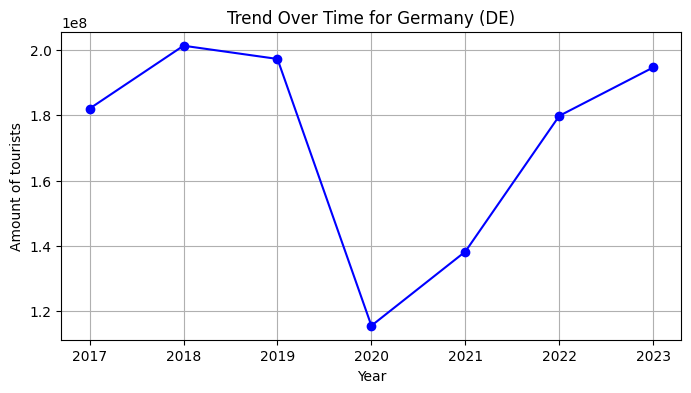

In [ ]:
# Ploting

import matplotlib.pyplot as plt

# Define the year columns and filter the dataframe for Germany (geo\TIME_PERIOD = 'DE')
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
df_de = df[df["geo\\TIME_PERIOD"] == "DE"]

# If there are multiple rows for Germany, you might choose to average them:
trend = df_de[years].mean()

plt.figure(figsize=(8, 4))
plt.plot(years, trend, marker='o', linestyle='-', color='b')
plt.title("Trend Over Time for Germany (DE)")
plt.xlabel("Year")
plt.ylabel("Amount of tourists")
plt.grid(True)
plt.show()


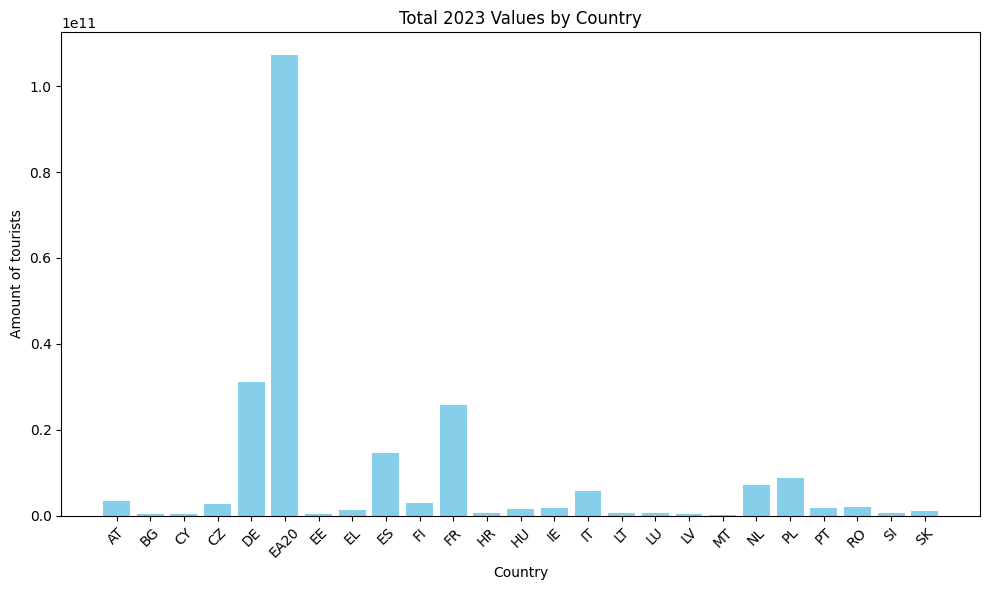

In [ ]:
import matplotlib.pyplot as plt

year = '2023'
# Group by country and sum the values for the chosen year
country_data = df.groupby("geo\\TIME_PERIOD")[year].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(country_data["geo\\TIME_PERIOD"], country_data[year], color='skyblue')
plt.title(f"Total {year} Values by Country")
plt.xlabel("Country")
plt.ylabel("Amount of Tourists")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


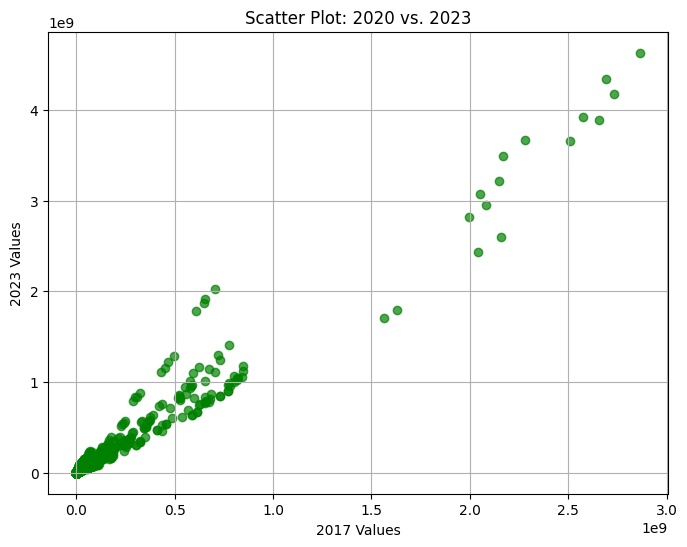

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['2020'], df['2023'], alpha=0.7, color='green')
plt.title("Scatter Plot: 2020 vs. 2023")
plt.xlabel("2017 Amount of Tourists")
plt.ylabel("2023 Amount of Tourists")
plt.grid(True)
plt.show()


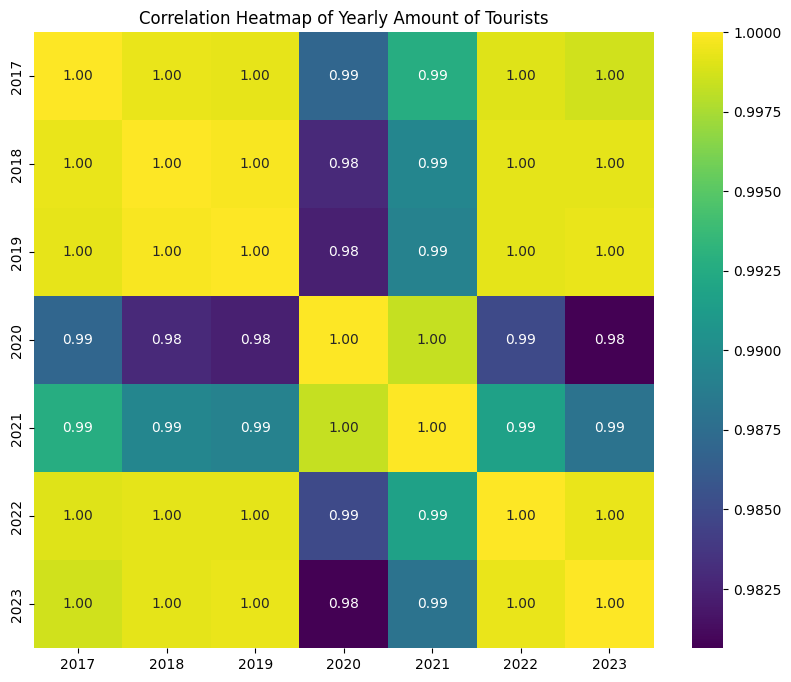

In [ ]:
import seaborn as sns
corr_matrix = df[years].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap of Yearly Amount of Tourists")
plt.show()

In [ ]:
# The year of 2020 and 2021 has no linear relations among other years.
# 2017-2019 and 2022-2023: In these time periods, yearly tourist amounts are very similar from year to year.
# Because of Covid-19, 2020 has the worst traveling amounts and 2021 is slowly went back.

In [ ]:
df.to_csv('cleaned_data.csv', index=False)
